In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the reservoir data from the CSV file
reservoir_data = pd.read_csv('Z:/Research_Projects/Reservoir_Project/reservoir_attributes_final_17.csv')

# Load the shapefile for your geographic region (replace 'shapefile.shp' with the actual path)
gdf = gpd.read_file('Z:/Research_Projects/Reservoir_Project/upper_parana_shp/upper_parana_.shp')



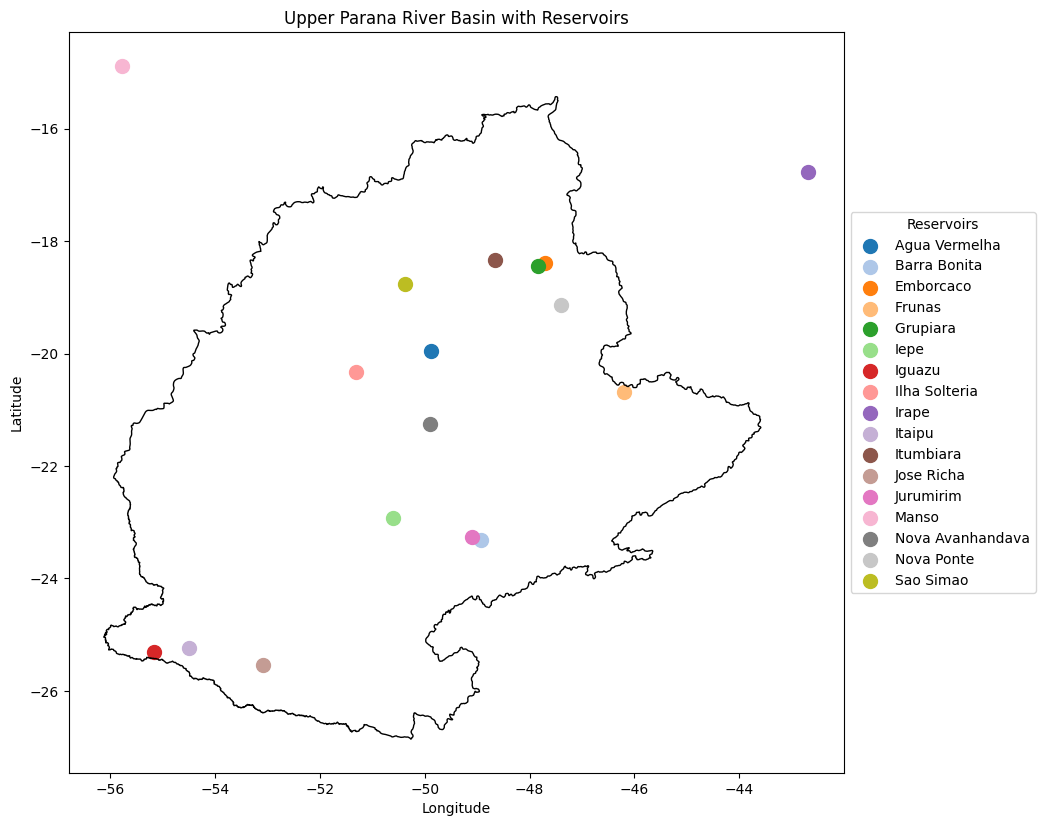

In [71]:
# Create a plot with the shapefile outline
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot the reservoirs on the same plot with different colors
cmap = plt.get_cmap("tab20")  # Using a colormap for different colors
colors = [cmap(i % 20) for i in range(len(reservoir_data))]

for i, row in reservoir_data.iterrows():
    plt.scatter(row['lon'], row['lat'], color=colors[i], s=100, label=row['name'])

# Set plot title and labels
plt.title("Upper Parana River Basin with Reservoirs")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a legend with reservoir names
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Reservoirs") 

# Show the plot
plt.savefig('Z:/Research_Projects/Reservoir_Project/reservoir_plots_figures/UP_Res_onesize.png')
plt.show()

In [73]:


# Create a GeoDataFrame from the reservoir data using 'latitude' and 'longitude' to create Point geometries
reservoir_data['geometry'] = gpd.points_from_xy(reservoir_data['lon'], reservoir_data['lat'])

# Set the CRS of both GeoDataFrames to ensure they match
gdf.crs = reservoir_data.crs

# Create a plot with the shapefile outline
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Calculate scaled marker sizes based on surface area values
max_surface_area = reservoir_data['surface_area'].max()
min_marker_size = 10  # Minimum marker size
max_marker_size = 500  # Maximum marker size

# Scale the marker size based on surface area, mapping it to the range [min_marker_size, max_marker_size]
reservoir_data['marker_size'] = (reservoir_data['surface_area'] - reservoir_data['surface_area'].min()) / (max_surface_area - reservoir_data['surface_area'].min()) * (max_marker_size - min_marker_size) + min_marker_size

# Plot the reservoirs on the same plot with different colors and scaled marker sizes
cmap = plt.get_cmap("tab20")
colors = [cmap(i % 20) for i in range(len(reservoir_data))]

for i, row in reservoir_data.iterrows():
    plt.scatter(row['lon'], row['lat'], color=colors[i], s=row['marker_size'], label=row['name'])

# Set plot title and labels
plt.title("Upper Parana River Basin with Reservoirs (Proportional to Surface Area)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a legend with reservoir names
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Reservoirs")  # Set the legend title

# Show the plot
plt.savefig('Z:/Research_Projects/Reservoir_Project/reservoir_plots_figures/UP_Res_porportional_to_SA.png')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'crs'

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines



# Create a GeoDataFrame from the reservoir data using 'latitude' and 'longitude' to create Point geometries
reservoir_data['geometry'] = gpd.points_from_xy(reservoir_data['longitude'], reservoir_data['latitude'])

# Set the CRS of both GeoDataFrames to ensure they match
gdf.crs = reservoir_data.crs

# Create a plot with the shapefile outline
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Calculate scaled marker sizes based on surface area values
max_surface_area = reservoir_data['surface_area'].max()
min_marker_size = 10  # Minimum marker size
max_marker_size = 300  # Maximum marker size

# Scale the marker size based on surface area, mapping it to the range [min_marker_size, max_marker_size]
reservoir_data['marker_size'] = (reservoir_data['surface_area'] - reservoir_data['surface_area'].min()) / (max_surface_area - reservoir_data['surface_area'].min()) * (max_marker_size - min_marker_size) + min_marker_size

# Plot the reservoirs on the same plot with different colors and scaled marker sizes
cmap = plt.get_cmap("tab20")
colors = [cmap(i % 20) for i in range(len(reservoir_data))]

for i, row in reservoir_data.iterrows():
    plt.scatter(row['longitude'], row['latitude'], color=colors[i], s=row['marker_size'], label=row['name'])

# Set plot title and labels
plt.title("Upper Parana River Basin with Reservoirs (Proportional to Surface Area)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Create a legend with reservoir names and standard marker size
legend_elements = [
    mlines.Line2D([], [], color='red', marker='o', markersize=10, label='Standard Marker Size'),
]
for i, row in reservoir_data.iterrows():
    legend_elements.append(mlines.Line2D([], [], color=colors[i], marker='o', markersize=10, label=row['name'], markeredgewidth=0))

legend = plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Legend")

# Show the plot
plt.show()


KeyError: 'longitude'